<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week_1_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Problem-1

How many samples does the dataset have?

In [10]:
# Enter your solution here
100

100

## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

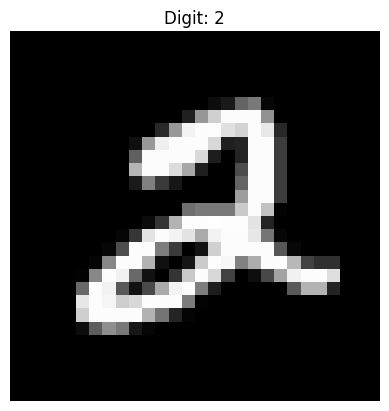

In [3]:
# Enter your solution here
import matplotlib.pyplot as plt

# Select the first image from X (flattened 784-d vector)
image_vector = X[0]

# Reshape it back to 28x28
image_2d = image_vector.reshape(28, 28)

# Plot the image
plt.imshow(image_2d, cmap='gray')
plt.title("Digit: 2")
plt.axis('off')  # Hide axes
plt.show()


## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [4]:
# Enter your solution here
import numpy as np

# Step 1: Center the dataset
X_mean = np.mean(X, axis=0)     # Mean of each feature (shape: [784])
X_prime = X - X_mean            # Centered dataset

# Step 2: Compute the average squared value
n, d = X_prime.shape
avg_squared_value = np.sum(X_prime ** 2) / (n * d)

# Print result rounded to 2 decimal places
print(round(avg_squared_value, 2))


4235.16


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [5]:
# Enter your solution here
# X_prime is the centered data matrix (n x d)
n, d = X_prime.shape

# Compute covariance matrix C (d x d)
C = (X_prime.T @ X_prime) / (n - 1)

# Compute average squared value of elements in C
avg_squared_C = np.sum(C ** 2) / (d ** 2)

# Print the result rounded to 2 decimals
print(round(avg_squared_C, 2))


1168163.54


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [6]:
# Enter your solution here
import numpy as np

# Assuming X_prime and C are defined (centered data and covariance matrix)

# Step 1: Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Step 2: Eigenvectors are columns; sort eigenvalues descending order and select top 2
idx = np.argsort(eigenvalues)[::-1]  # indices for descending order
w1 = eigenvectors[:, idx[0]]  # first principal component
w2 = eigenvectors[:, idx[1]]  # second principal component

# Step 3: Sum the first two principal components
w = w1 + w2

# Step 4: Compute absolute sum of elements of w
result = abs(np.sum(w))

# Print result rounded to 2 decimals
print(round(result, 2))


1.05


## Problem-7

Visualize the first principal component as an image.

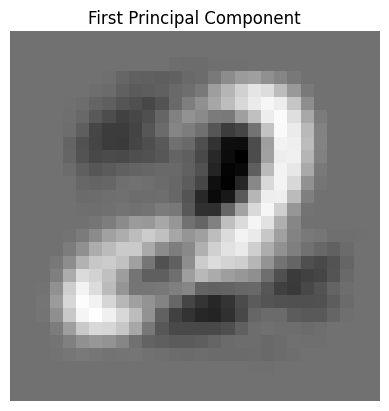

In [7]:
# Enter your solution here
import matplotlib.pyplot as plt

# Assuming w1 is the first principal component vector of length 784
w1_image = w1.reshape(28, 28)

plt.imshow(w1_image, cmap='gray')
plt.title("First Principal Component")
plt.axis('off')  # Hide the axes
plt.show()


## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [8]:
# Enter your solution here
# eigenvalues are already computed: eigenvalues

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Compute explained variance ratio
explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Find smallest k where explained variance ratio >= 0.95
k = np.argmax(explained_variance_ratio >= 0.95) + 1  # +1 because indices start at 0

print(k)


53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



Values of k for variance thresholds: {0.2: np.int64(2), 0.5: np.int64(6), 0.8: np.int64(22), 0.95: np.int64(53)}


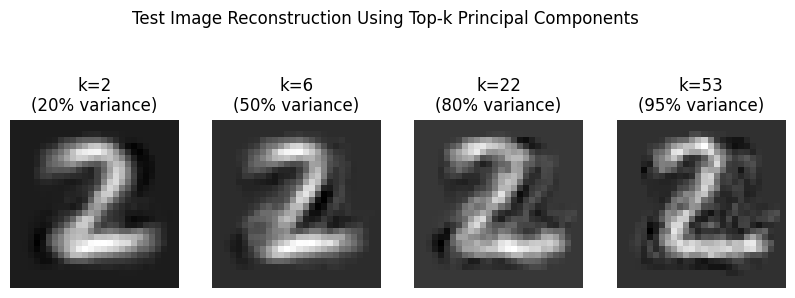

In [9]:
# Enter your solution here
import matplotlib.pyplot as plt

# Assuming:
# - C: covariance matrix
# - eigenvalues, eigenvectors: from np.linalg.eigh(C)
# - test_image: vector of shape (784,)

# 1. Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

# 2. Compute cumulative variance ratio
explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# 3. Variance thresholds to check
thresholds = [0.20, 0.50, 0.80, 0.95]
ks = [np.argmax(explained_variance_ratio >= t) + 1 for t in thresholds]

print(f"Values of k for variance thresholds: {dict(zip(thresholds, ks))}")

# 4. Center test image by subtracting training mean
test_image_centered = test_image - X_mean

# 5. Function to reconstruct image given k
def reconstruct_image(k):
    W_k = sorted_eigenvectors[:, :k]  # top k eigenvectors (d x k)
    z = W_k.T @ test_image_centered    # projection coefficients (k,)
    reconstruction = W_k @ z           # reconstruct in original space (d,)
    reconstruction += X_mean           # add mean back to get actual image
    return reconstruction

# 6. Plotting
plt.figure(figsize=(10, 4))
for i, k in enumerate(ks, 1):
    reconstructed_img = reconstruct_image(k).reshape(28, 28)
    plt.subplot(1, 4, i)
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f"k={k}\n({int(thresholds[i-1]*100)}% variance)")
    plt.axis('off')

plt.suptitle("Test Image Reconstruction Using Top-k Principal Components")
plt.show()
